In [9]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import math

In [3]:
scaler = joblib.load("../scaler.save")
data_train = "../train_next_day.h5"
data_test = "../test_next_day.h5"
train = pd.read_hdf(data_train)
test = pd.read_hdf(data_test)
train.head(50)

,Adj Close,sentiment,sec0,sec1,sec2,sec3,sec4,sec5,sec6,sec7,...,sec41,sec42,sec43,sec44,sec45,sec46,sec47,sec48,sec49,next_day_value
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,-0.638193,-0.076487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.712319
2012-05-21,-0.712319,0.043950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.765796
2012-05-22,-0.765796,-0.182019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.748147
2012-05-23,-0.748147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.729968
2012-05-24,-0.729968,-0.126471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.749735
2012-05-25,-0.749735,0.066473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.803918
2012-05-29,-0.803918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.815390
2012-05-30,-0.815390,0.208429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.790505
2012-05-31,-0.790505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.823685


In [4]:
def create_data(df, days, features):
    num_data = df.shape[0]
    df2 = df.values
    sequences = num_data - days + 1
    x = np.zeros((sequences, days*features))
    y = np.zeros((sequences))
    dates = []
    for seq in range(sequences):
        x[seq, :] = df2[seq:seq+days, 0:features].reshape(days*features)
        y[seq] = df2[seq+days-1, features]
        dates.append(df.index[seq+days-1])
    return x,  y, dates

In [5]:
x_train, y_train, _ = create_data(train, 40, 52)
x_test, y_test, dates = create_data(test, 40, 52)

In [6]:
model = Sequential()
model.add(Dense(14000, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1))
adam = Adam(lr=0.0000005, beta_1=0.75, beta_2=0.995, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error',
             optimizer=adam,
             metrics=['mse'])


In [67]:
history = History()
model.fit(x_train, y_train, epochs=300, batch_size=56, callbacks=[history])

Epoch 1/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.2940 - mean_squared_error: 0.2940
Epoch 2/300
1051/1051 [==============================] - 1s 678us/step - loss: 0.2817 - mean_squared_error: 0.2817
Epoch 3/300
1051/1051 [==============================] - 1s 664us/step - loss: 0.2718 - mean_squared_error: 0.2718
Epoch 4/300
1051/1051 [==============================] - 1s 653us/step - loss: 0.2571 - mean_squared_error: 0.2571
Epoch 5/300
1051/1051 [==============================] - 1s 669us/step - loss: 0.2491 - mean_squared_error: 0.2491
Epoch 6/300
1051/1051 [==============================] - 1s 656us/step - loss: 0.2368 - mean_squared_error: 0.2368
Epoch 7/300
1051/1051 [==============================] - 1s 656us/step - loss: 0.2202 - mean_squared_error: 0.2202
Epoch 8/300
1051/1051 [==============================] - 1s 662us/step - loss: 0.2114 - mean_squared_error: 0.2114
Epoch 9/300
1051/1051 [==============================] - 1s 656us/step - loss: 0.1

1051/1051 [==============================] - 1s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 142/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 143/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 144/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 145/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 146/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 147/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 148/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 149/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0110 - mean_s

1051/1051 [==============================] - 3s 3ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 284/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 285/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 286/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 287/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 288/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 289/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 290/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 291/300
1051/1051 [==============================] - 3s 3ms/step - loss: 0.0088 - mean_s

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 14000)             29134000  
_________________________________________________________________
dropout_6 (Dropout)          (None, 14000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 14001     
Total params: 29,148,001
Trainable params: 29,148,001
Non-trainable params: 0
_________________________________________________________________


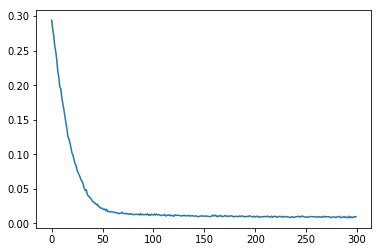

In [69]:
plt.plot(history.history['mean_squared_error'])

In [11]:
model.load_weights("../next_day_ann.h5")

In [13]:
train_mse, _ = model.evaluate(x_train, y_train)
print("ANN Train RMSE: {}",format(math.sqrt(train_mse)))

1051/1051 [==============================] - 0s 96us/step
ANN Train RMSE: {} 0.031258234107144615


In [15]:
mse, _ = model.evaluate(x_test, y_test)
print("ANN Test RMSE: {}".format(math.sqrt(mse)))

429/429 [==============================] - 0s 91us/step
ANN Test RMSE: 0.15485088697796645


In [71]:
predicted = model.predict(x_test)

In [72]:
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1)

In [73]:
dates = dates[:100]
date_ticks = dates[:100:10]
actual = actual[:100]
predicted = predicted[:100]

Text(0.5,1,'ANN Model - Next Day Prediction')

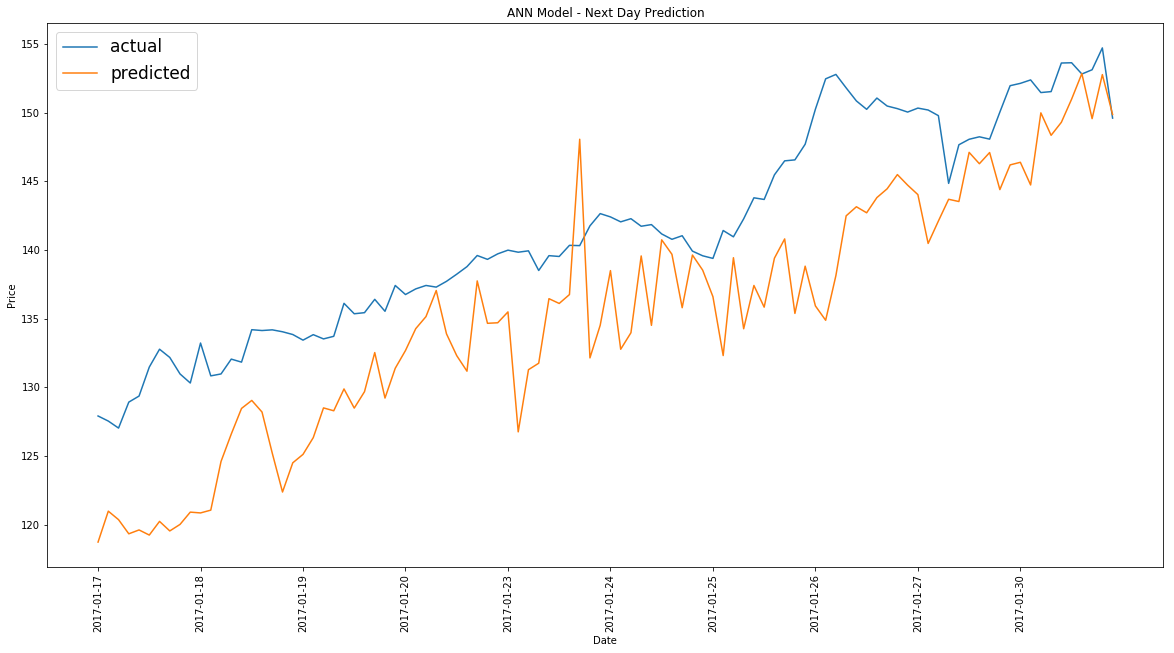

In [74]:
plt.figure(figsize=(20,10))
plt.plot(dates, actual, label='actual')
plt.plot(dates, predicted, label='predicted')
plt.ylabel("Price")
plt.xticks(date_ticks, rotation=90)
plt.xlabel("Date")
plt.legend(prop={'size': 17})
plt.title("ANN Model - Next Day Prediction")

In [76]:
model.save_weights("../next_day_ann.h5")